In [6]:
import pandas as pd
import numpy as np
import random
from datetime import datetime, timedelta

In [7]:
# Gather sample Data - Without data relevant to my current job available, sample data will be randomly created
# for analysis. 

# The random sample will include:
## Project IDs
## Start & End Dates
## Budget
## Resource Use
## Project Manager
## Project Status
## Client Satisfaction
## Project Type

In [8]:
# Creating a sample DataFrame for project data
num_projects = 1000

# Generating random project IDs
project_ids = ['Project_' + str(i) for i in range(1, num_projects + 1)]

# Generating random start and end dates for projects
start_dates = [datetime(2021, 1, 1) + timedelta(days=random.randint(0, 365)) for _ in range(num_projects)]
end_dates = [start + timedelta(days=random.randint(30, 365)) for start in start_dates]

# Generating random budget, resource utilization, and additional details
budgets = [random.randint(10000, 1000000) for _ in range(num_projects)]
resource_utilization = [random.uniform(0.5, 1.0) for _ in range(num_projects)]
project_manager = [random.choice(['Alice', 'Bob', 'Charlie', 'David', 'Rachel', 'Sarah']) for _ in range(num_projects)]
project_status = [random.choice(['In Progress', 'Completed', 'On Hold']) for _ in range(num_projects)]
client_satisfaction = [random.randint(1, 5) for _ in range(num_projects)]
project_type = [random.choice(['Infrastructure', 'Software', 'Mechanical', 'Electrical', 'Biochemical']) for _ in range(num_projects)]

# Creating the DataFrame
data = {
    'Project ID': project_ids,
    'Start Date': start_dates,
    'End Date': end_dates,
    'Budget': budgets,
    'Resource Utilization': resource_utilization,
    'Project Manager': project_manager,
    'Project Status': project_status,
    'Client Satisfaction': client_satisfaction,
    'Project Type': project_type
}

project_df = pd.DataFrame(data)

In [9]:
# Previewing the random sample data
print(project_df.head())

  Project ID Start Date   End Date  Budget  Resource Utilization  \
0  Project_1 2021-09-25 2022-01-21  101209              0.692493   
1  Project_2 2021-05-16 2021-11-01  651576              0.839382   
2  Project_3 2021-05-24 2022-02-08  177505              0.715320   
3  Project_4 2021-09-13 2022-01-12   75634              0.888418   
4  Project_5 2021-02-19 2021-06-25  722743              0.620232   

  Project Manager Project Status  Client Satisfaction Project Type  
0             Bob    In Progress                    2  Biochemical  
1             Bob    In Progress                    3  Biochemical  
2           Alice    In Progress                    5     Software  
3             Bob    In Progress                    5     Software  
4           Sarah      Completed                    1   Electrical  


In [10]:
# Saving randomized sample data as a .csv file
project_df.to_csv('project_data.csv', index=False)

In [11]:
# Data Cleaning

In [12]:
# Checking for missing values
print(project_df.isnull().sum())

# Filling missing budget values with mean budget
project_df['Budget'].fillna(project_df['Budget'].mean(), inplace=True)

# Making sure Start & End dates are in the proper format
project_df['Start Date'] = pd.to_datetime(project_df['Start Date'])
project_df['End Date'] = pd.to_datetime(project_df['End Date'])

# Current project duration (number of days) more informative than dates
# Calculating duratino and removing start / end date columns
project_df['Project Duration'] = (project_df['End Date'] - project_df['Start Date']).dt.days
project_df.drop(['Start Date', 'End Date'], axis=1, inplace=True)

Project ID              0
Start Date              0
End Date                0
Budget                  0
Resource Utilization    0
Project Manager         0
Project Status          0
Client Satisfaction     0
Project Type            0
dtype: int64


In [13]:
# Previewing the cleaned data sample
print(project_df.head())

  Project ID  Budget  Resource Utilization Project Manager Project Status  \
0  Project_1  101209              0.692493             Bob    In Progress   
1  Project_2  651576              0.839382             Bob    In Progress   
2  Project_3  177505              0.715320           Alice    In Progress   
3  Project_4   75634              0.888418             Bob    In Progress   
4  Project_5  722743              0.620232           Sarah      Completed   

   Client Satisfaction Project Type  Project Duration  
0                    2  Biochemical               118  
1                    3  Biochemical               169  
2                    5     Software               260  
3                    5     Software               121  
4                    1   Electrical               126  


In [14]:
# Saving cleaned data to .csv file
project_df.to_csv('clean_project_data.csv', index=False)

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
#Basic Stats
print(project_df.describe())

              Budget  Resource Utilization  Client Satisfaction  \
count    1000.000000           1000.000000          1000.000000   
mean   503435.054000              0.745446             3.018000   
std    282285.556579              0.140103             1.404154   
min     10349.000000              0.500963             1.000000   
25%    260659.000000              0.628809             2.000000   
50%    504405.500000              0.745298             3.000000   
75%    744398.000000              0.864982             4.000000   
max    999490.000000              0.999551             5.000000   

       Project Duration  
count       1000.000000  
mean         191.169000  
std           93.431729  
min           30.000000  
25%          114.000000  
50%          188.000000  
75%          265.250000  
max          365.000000  


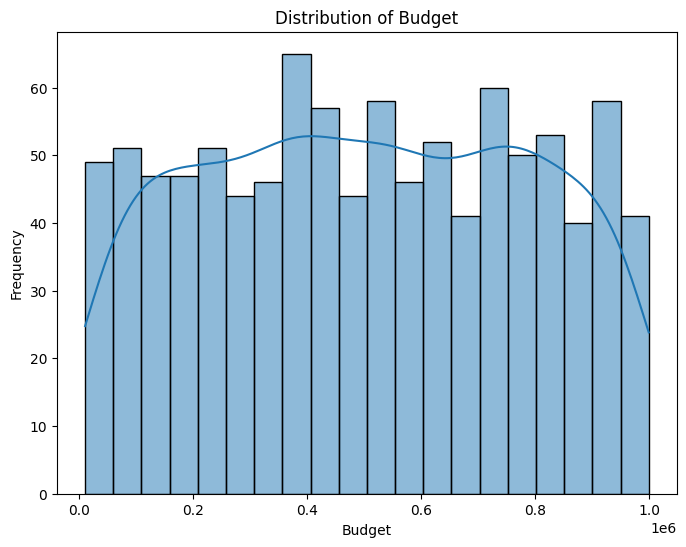

In [18]:
# Visualization of the Budget Distribution
plt.figure(figsize=(8, 6))
sns.histplot(project_df['Budget'], bins=20, kde=True)
plt.title('Distribution of Budget')
plt.xlabel('Budget')
plt.ylabel('Frequency')
plt.show()

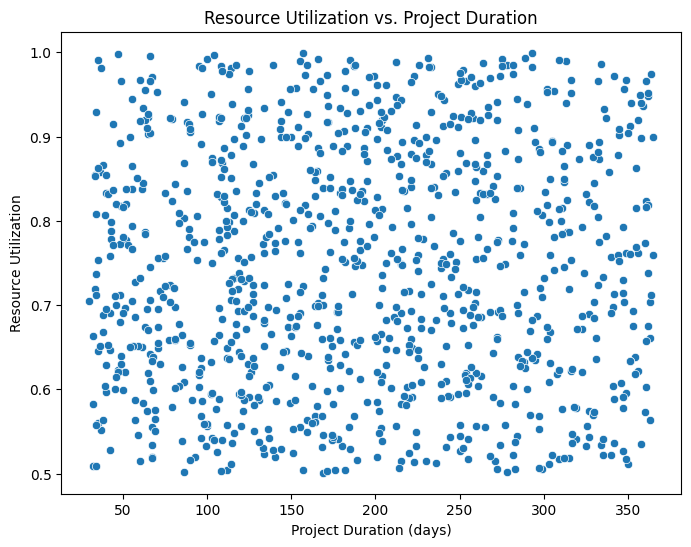

In [20]:
# Visualization of Resource Utilization vs. Project Duration
plt.figure(figsize=(8, 6))
sns.scatterplot(data=project_df, x='Project Duration', y='Resource Utilization')
plt.title('Resource Utilization vs. Project Duration')
plt.xlabel('Project Duration (days)')
plt.ylabel('Resource Utilization')
plt.show()

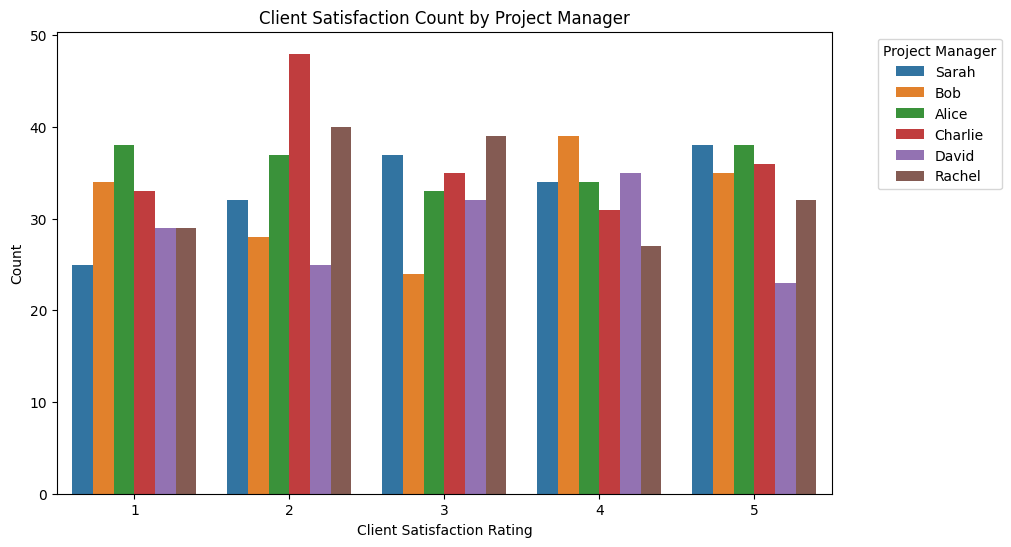

In [21]:
# Visualization of Client Satisfaction Count by Project Manager
plt.figure(figsize=(10, 6))
sns.countplot(data=project_df, x='Client Satisfaction', hue='Project Manager')
plt.title('Client Satisfaction Count by Project Manager')
plt.xlabel('Client Satisfaction Rating')
plt.ylabel('Count')
plt.legend(title='Project Manager', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

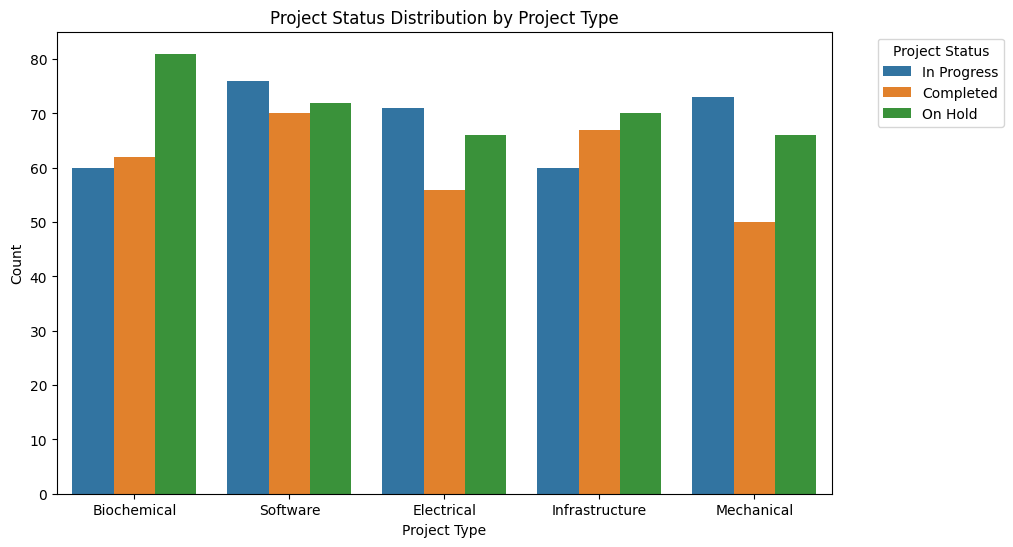

In [22]:
# Visualization of Project Status Distribution by Project Type
plt.figure(figsize=(10, 6))
sns.countplot(data=project_df, x='Project Type', hue='Project Status')
plt.title('Project Status Distribution by Project Type')
plt.xlabel('Project Type')
plt.ylabel('Count')
plt.legend(title='Project Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()